# Logistic Regression as a Single Neuran of a Neural Network

Welcome to your first programming assignment! You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset where logistic regression represents a single nueron. 

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 -  Loading Packages ##
First, let's run the cell below to import all the packages that you will need during this assignment. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import glob
from sklearn.model_selection import train_test_split

%matplotlib inline

## 2 - Utility functions to convert images into datasets ##
The following functions are used to convert the cats and dogs images in the dataset folder into the numpy array format with labels. 

### 2.1 - Load data set ###
Use the utility functions provided above to load the train_set_x,train_set_y, test_set_x, test_set_y.
Set the `num_px` to 64 and keep the `test_size` as the default value.

In [2]:
# set the num_pix to 64
num_px = 64
PATH = "D:\Semester 3\AI & Deep Learning Framework\Assignments\Assignment 1\car_dataset.hdf5"
def load_dataset(PATH):
    # open dataset 
    dataset_db = h5py.File(PATH, "r")   
    
    datasets = {}
    for dataset in ["train", "dev", "test"]:
        
        # load the train set feautres (picture)
        datasets[dataset] = {'X' : np.array(dataset_db[dataset + "_img"][:]),  # dataset features
                              'Y' : np.array(dataset_db[dataset + "_labels"][:]) # dataset labels
                            }
    return datasets

# Code for splitting the data to train and test data
def create_train_test_data(datasets):
    X_train = datasets['train']['X']
    X_test = datasets['test']['X']
    y_train = datasets['train']['Y']
    y_test = datasets['test']['Y']
    X_dev =  datasets['dev']['X']
    y_dev =  datasets['dev']['Y']
    
    return X_train, X_test, y_train, y_test, X_dev, y_dev
pass

In [3]:
datasets=load_dataset("D:\Semester 3\AI & Deep Learning Framework\Assignments\Assignment 1\car_dataset.hdf5")
X_train, X_test, y_train, y_test, X_dev, y_dev =create_train_test_data(datasets)
print(len(y_dev))

172


#### 2.1.1 - Print the shapes ###
Print the shape of the following variables
- Number of training examples: m_train
- Number of testing examples: m_test
- Height/Width of each image: num_px
- train_set_x shape
- train_set_y shape
- test_set_x shape
- test_set_y shape

In [4]:

X = X_train.shape[0]
y = X_test.shape[0]
num_px = X_train.shape[1]

print ("Number of training examples: X_train = " + str(X))
print ("Number of testing examples: X_test = " + str(y))

print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))
print ("test_dev_x shape: " + str(X_dev.shape))
print ("test_dev_y shape: " + str(y_dev.shape))


Number of training examples: X_train = 517
Number of testing examples: X_test = 173
train_set_x shape: (517, 64, 64, 3)
train_set_y shape: (517,)
test_set_x shape: (173, 64, 64, 3)
test_set_y shape: (173,)
test_dev_x shape: (172, 64, 64, 3)
test_dev_y shape: (172,)


#### 2.1.2 - Fixing ill-shape vectors ####
It is possible that the train_set_y and test_set_y have an ill-shape. Fix these shapes so the train_set_y and test_set_y are represented as a matrix with size (1, number of examples)

In [5]:

train_set_y=np.reshape(y_train,(1,y_train.shape[0]))
test_set_y=np.reshape(y_test,(1,y_test.shape[0]))
dev_set_y = np.reshape(y_dev,(1,y_dev.shape[0]))

print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("dev_set_y shape: " + str(dev_set_y.shape))

train_set_y shape: (1, 517)
test_set_y shape: (1, 173)
dev_set_y shape: (1, 172)


### 2.2 - Flatten the data
Reshape the training and test data sets so that each image is flattened into single vectors of shape (num_px  ∗ num_px  ∗ 3, 1). Check the shapes for train_set_x_flatten and test_set_x_flatten.

In [6]:
train_set_x_flatten = X_train.reshape(X_train.shape[0],-1).T
test_set_x_flatten = X_test.reshape(X_test.shape[0],-1).T
dev_set_x_flatten = X_dev.reshape(X_dev.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("dev_set_x_flatten shape: " + str(dev_set_x_flatten.shape))
print ("dev_set_y shape: " + str(dev_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 517)
train_set_y shape: (1, 517)
test_set_x_flatten shape: (12288, 173)
test_set_y shape: (1, 173)
dev_set_x_flatten shape: (12288, 172)
dev_set_y shape: (1, 172)
sanity check after reshaping: [127 127 127 127 127]


### 2.3 - Standardize the data
Divide every row of the dataset by 255 

In [7]:
train_set_x =train_set_x_flatten/255.
test_set_x =test_set_x_flatten/255.
dev_set_x =dev_set_x_flatten/255.

## 3 - Implementing the Helper Functions ## 

### 3.1 - Sigmoid function
Implement `sigmoid()`. 

In [8]:
def sigmoid(z):
 """
 Compute the sigmoid of z
 Arguments:
 z -- A scalar or numpy array of any size.
 Return:
 s -- sigmoid(z)
 """

 s = 1/(1+ np.exp(-z))

 return s

In [9]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


### 3.2 - Implement initialize_with_zeros
Write a function that initializes initialize w as a vector of zeros and set `b` to zero. 

In [10]:
# GRADED FUNCTION: initialize_with_zeros
def initialize_with_zeros(dim):
 """
 This function creates a vector of zeros of shape (dim, 1) for w and initialize

 Argument:
 dim -- size of the w vector we want (or number of parameters in this case)

 Returns:
 w -- initialized vector of shape (dim, 1)
 b -- initialized scalar (corresponds to the bias)
 """

 w, b = np.zeros((dim,1)), 0

 assert(w.shape == (dim, 1))
 assert(isinstance(b, float) or isinstance(b, int))
 return w, b

In [11]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


### 3.3 - Forward propagation

Implement forward propagation to calculate $A$ and cost.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$


### 3.4 - Backward propagation

Implement backward propagation to compute gradients $dw$ and $db$
Here are the two formulas you will be using: 

$$ dw = \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ db = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [12]:
def propagate(w,b,X,Y):
    m = X.shape[1]

    # forward prop
    A = sigmoid(np.dot(np.transpose(w),X)+b)
    cost = (-1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    
    # backward prop
    dw = (1/m)*np.dot(X,np.transpose(A-Y))
    db = (1/m)*np.sum(A-Y)
    
    # Ensuring cost is a scalar by removing any dimensions of length 1
    cost = np.squeeze(cost)

    # Gradients are stored in a dictionary for use during optimization phase
    grads = {"dw": dw,
            "db": db}
    
    return grads,cost

In [13]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


### 3.5 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. 

In [14]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [15]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


### 3.6 - Prediction

Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [16]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a car being present in the picture

    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]

        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
     
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [17]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


## 4 - Regression Model ##
Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [18]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
     # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [19]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.348325
Cost after iteration 200: 0.293235
Cost after iteration 300: 0.263346
Cost after iteration 400: 0.242531
Cost after iteration 500: 0.226353
Cost after iteration 600: 0.213014
Cost after iteration 700: 0.201614
Cost after iteration 800: 0.191640
Cost after iteration 900: 0.182771
Cost after iteration 1000: 0.174791
Cost after iteration 1100: 0.167547
Cost after iteration 1200: 0.160925
Cost after iteration 1300: 0.154839
Cost after iteration 1400: 0.149219
Cost after iteration 1500: 0.144009
Cost after iteration 1600: 0.139162
Cost after iteration 1700: 0.134640
Cost after iteration 1800: 0.130409
Cost after iteration 1900: 0.126441
train accuracy: 97.48549323017409 %
test accuracy: 89.59537572254335 %


## 5. Run the regression model function to train your model.
### 5.1 - Setting parameters (part 1)
Set the `num_iterations` to 5000 and `learning_rate` to 0.0005

In [20]:
learning_rates = [0.0005]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(learning_rates))
    models = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

learning rate is: [0.0005]
train accuracy: 89.16827852998065 %
test accuracy: 85.54913294797687 %

-------------------------------------------------------



In [21]:
Y_prediction_dev = predict(models['w'], models['b'], dev_set_x)
print("dev_set accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_dev - dev_set_y)) * 100))

dev_set accuracy: 91.86046511627907 %


Let's also plot the cost function and the gradients.

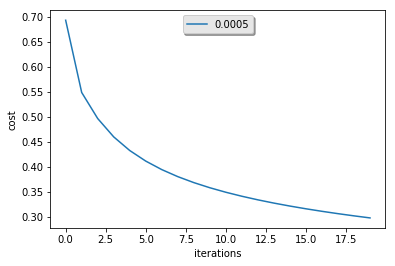

In [22]:
for i in learning_rates:
    plt.plot(np.squeeze(models["costs"]), label= str(models["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

### 5.1 - Setting parameters (part 2)
Set the `num_iterations` to 2000 and `learning_rate` to 0.005 and run the model again. Plot the cost function.

In [23]:
learning_rates = [0.005]
models1 = {}
for i in learning_rates:
    print ("learning rate is: " + str(learning_rates))
    models1 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

learning rate is: [0.005]
train accuracy: 97.48549323017409 %
test accuracy: 89.59537572254335 %

-------------------------------------------------------



In [24]:
Y_prediction_dev = predict(models1['w'], models1['b'], dev_set_x)
print("dev_set accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_dev - dev_set_y)) * 100))

dev_set accuracy: 91.86046511627907 %


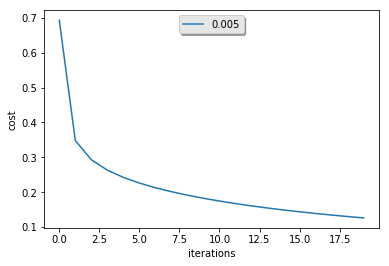

In [25]:
for i in learning_rates:
    plt.plot(np.squeeze(models1["costs"]), label= str(models1["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

### 5.3 - Analysis
Compare the cost function plots of part_1 and part_2. Write your observation below.

#### Write Your observation here
......

In [26]:
# Different learning rates give different costs and thus different predictions results.
# If the learning rate is too large, the cost may oscillate up and down. It may even diverge.
# A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.

# In deep learning, we usually:
# Choose the learning rate that better minimizes the cost function.
# If our model overfits, use other techniques to reduce overfitting.

# In plot 1
# When the learning rate is: 0.0005
# we get the training accuracy as 89.16827852998065 % and the test accuracy as 85.54913294797687 %
# whereas 
# In plot 2
# When the learning rate is: 0.005
# we get the training accuracy as 97.48549323017409 % and the test accuracy as 89.59537572254335 %

